# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [23]:
boston = pd.read_csv('../data/boston_data.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [24]:
# Your code here

boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [25]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [26]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [27]:
# Finding the outliers

Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

print(boston < (Q1 - 1.5 * IQR)) |(boston > (Q3 + 1.5 * IQR))

crim         3.970775
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.178000
rm           0.726500
age         48.350000
dis          3.134250
rad         20.000000
tax        385.000000
ptratio      2.825000
black       21.297500
lstat        9.775000
medv         7.900000
dtype: float64
      crim     zn  indus   chas    nox     rm    age    dis    rad    tax  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [28]:
boston.shape

(404, 14)

In [29]:
# Remove the outliers

boston_2 = boston[~((boston[boston.columns.difference(['chas'])] < (Q1 - 1.5 * IQR)) |(boston[boston.columns.difference(['chas'])] > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_2.shape

(246, 14)

In [30]:
boston_2.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,1.352420,3.884146,10.883293,0.073171,0.542052,6.185996,67.167886,3.935714,7.735772,370.711382,18.677642,388.683618,12.256545,21.492276
std,2.487150,8.582005,6.307069,0.260947,0.107413,0.445766,26.651000,1.752579,7.422477,151.442621,1.773325,11.545275,5.643095,4.986461
min,0.006320,0.000000,1.380000,0.000000,0.409000,4.903000,2.900000,1.321600,1.000000,188.000000,14.700000,343.280000,2.940000,7.000000
25%,0.088267,0.000000,5.960000,0.000000,0.458500,5.885750,48.125000,2.506175,4.000000,277.000000,17.800000,386.457500,8.062500,18.825000
50%,0.180290,0.000000,8.560000,0.000000,0.520000,6.167000,70.850000,3.651900,5.000000,307.000000,18.900000,393.245000,11.170000,21.400000
75%,0.786055,0.000000,18.100000,0.000000,0.581000,6.437750,91.175000,5.237175,6.750000,403.000000,20.200000,396.900000,15.455000,23.900000
max,9.966540,30.000000,27.740000,1.000000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,36.200000


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

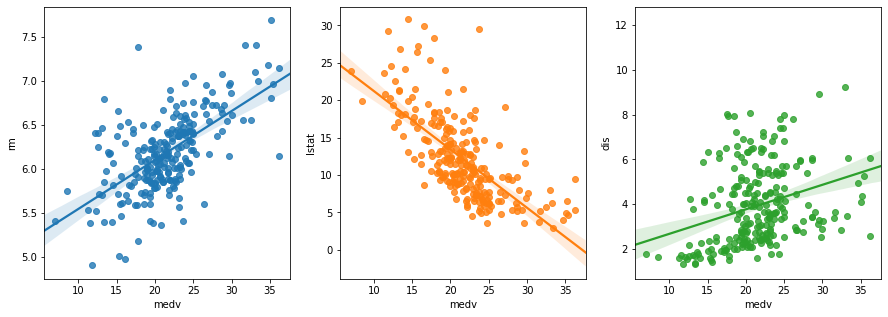

In [31]:
# Your plots here

f, axes = plt.subplots(1, 3, figsize=(15,5))

ax_1 = sns.regplot(x='medv', y = 'rm', data = boston_2, ax=axes[0])
ax_2 = sns.regplot(x='medv', y = 'lstat', data = boston_2, ax=axes[1])
ax_3 = sns.regplot(x='medv', y = 'dis', data = boston_2, ax=axes[2])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [32]:
# Your response here

# 'nr' (Average nr of rooms) and 'dis' (weighted distances to five Boston employment centres) have 
# positive linear relationships with 'medv' (prices of homes)

# 'lstat' (% lower status of the population) has a negative linear relationship with 'medv'

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

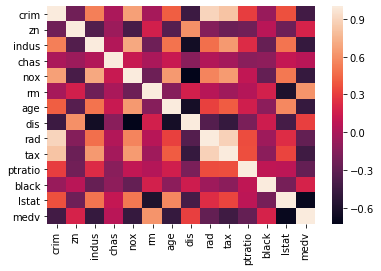

In [33]:
# Your response here

sns.heatmap(boston_2.corr())

# crim and rad columns have a high correlation
# rad and tax columns have a high correlation


In [34]:
# remove 'rad' feature as it has a high correlation with 'crim' and 'tax' features

boston_3 = boston_2.drop(columns='rad')

## Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [35]:
# Your code here

boston_3['medv'].describe()

count    246.000000
mean      21.492276
std        4.986461
min        7.000000
25%       18.825000
50%       21.400000
75%       23.900000
max       36.200000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [36]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)
    

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [37]:
# Your code here

boston_shuffled = boston_3.sample(frac=1)

y = boston_shuffled['medv'] 
X = boston_shuffled[boston_shuffled.columns.difference(['medv'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [38]:
# Five separate RFR here with the given max depths

rfr_2 = RandomForestRegressor(max_depth=2).fit(X_train, y_train)
rfr_4 = RandomForestRegressor(max_depth=4).fit(X_train, y_train)
rfr_6 = RandomForestRegressor(max_depth=6).fit(X_train, y_train)
rfr_8 = RandomForestRegressor(max_depth=8).fit(X_train, y_train)
rfr_10 = RandomForestRegressor(max_depth=10).fit(X_train, y_train)

C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Now, plot the score for each tree on the training set and on the testing set.

In [40]:
# Produce a plot with the score for the testing and training for the different max depths

y_pred_train_2 = rfr_2.predict(X_train)
y_pred_train_4 = rfr_4.predict(X_train)
y_pred_train_6 = rfr_6.predict(X_train)
y_pred_train_8 = rfr_8.predict(X_train)
y_pred_train_10 = rfr_10.predict(X_train)


y_pred_test_2 = rfr_2.predict(X_test)
y_pred_test_4 = rfr_4.predict(X_test)
y_pred_test_6 = rfr_6.predict(X_test)
y_pred_test_8 = rfr_8.predict(X_test)
y_pred_test_10 = rfr_10.predict(X_test)


score_train_2 = performance_metric(y_train, y_pred_train_2)
score_train_4 = performance_metric(y_train, y_pred_train_4)
score_train_6 = performance_metric(y_train, y_pred_train_6)
score_train_8 = performance_metric(y_train, y_pred_train_8)
score_train_10 = performance_metric(y_train, y_pred_train_10)

score_test_2 = performance_metric(y_test, y_pred_test_2)
score_test_4 = performance_metric(y_test, y_pred_test_4)
score_test_6 = performance_metric(y_test, y_pred_test_6)
score_test_8 = performance_metric(y_test, y_pred_test_8)
score_test_10 = performance_metric(y_test, y_pred_test_10)

print('Max depth 2:','\nTrain set',score_train_2, 'Test set', score_test_2)
print('Max depth 4:','\nTrain set',score_train_4, 'Test set', score_test_4)
print('Max depth 6:','\nTrain set',score_train_6, 'Test set', score_test_6)
print('Max depth 8:','\nTrain set',score_train_8, 'Test set', score_test_8)
print('Max depth 10:','\nTrain set',score_train_10, 'Test set', score_test_10)

Max depth 2: 
Train set 0.7192276464983512 Test set 0.42799012125540814
Max depth 4: 
Train set 0.8621474720544571 Test set 0.5452740767629534
Max depth 6: 
Train set 0.9211445558232159 Test set 0.5819447261964759
Max depth 8: 
Train set 0.9383924177494749 Test set 0.6036091602979716
Max depth 10: 
Train set 0.9567219321576443 Test set 0.7068183584764194


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [41]:
# Your response here

# The performance of the model improves by increasing the max_depth parameter

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [42]:
# Your response here

rfr_1 = RandomForestRegressor(max_depth=1).fit(X_train, y_train)
y_pred_train_1 = rfr_1.predict(X_train)
score_train_1 = performance_metric(y_train, y_pred_train_1)
print('Max depth 1:',score_train_1, 'Model suffers from high bias')
print('Max depth 10:',score_train_10, 'Model has the optimum capacity')




Max depth 1: 0.48395537822368684 Model suffers from high bias
Max depth 10: 0.9567219321576443 Model has the optimum capacity


C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [43]:
# Your response here

rfr = RandomForestRegressor(max_depth=14).fit(X_train, y_train)
y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)

score_train = performance_metric(y_train, y_pred_train)
score_test = performance_metric(y_test, y_pred_test)

print('Max_depth:', '\nTrain',score_train, '\nTest',score_test, '\nDifference:',(score_train-score_test))

# The performance imporves if the max_depth is increased to 14

Max_depth: 
Train 0.9518746315838079 
Test 0.6027362455880606 
Difference: 0.3491383859957473


C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [44]:
# Your response here

"""
The constructed model should not be used in a real-world setting.
This dataset is very specific, the model would not be applicable for rural areas or other cities than Boston.
As the data was collected a few decades ago, some of the features included in the dataset might not be 
applicable to describe a home in 2019.

"""